In [209]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize, fsolve
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

## social cost of DSIC mechansim for two player game and various alphas
- social cost = c \cdot x
- show various values of alpha

In [30]:
n      = 2
c1     = 1.
alphas = [2,3,4]
c2s    = np.arange(1, 5, 0.1) 

In [31]:
def getDSICAllo(cs, alpha):
    den = sum([c**(-alpha) for c in cs])
    return cs**(-alpha) / den

In [45]:
xs = []
ws = []
for a in alphas:
    temp1, temp2 = [], []
    for c2 in c2s:
        cs = np.array([c1, c2])

        x = getDSICAllo(cs, alpha=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
    xs.append(temp1)
    ws.append(temp2)
xs = np.array(xs)
ws = np.array(ws)
xs.shape, ws.shape

((3, 40, 2), (3, 40))

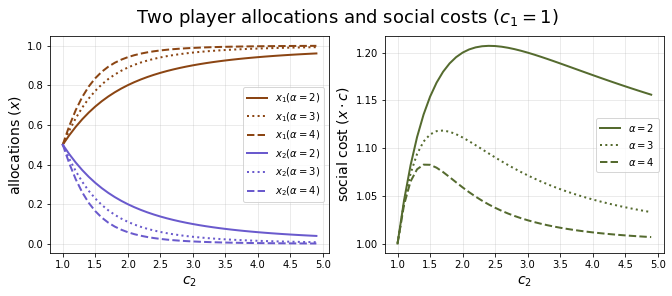

In [116]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,4))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

f.suptitle(r'Two player allocations and social costs ($c_1=1$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

## DSIC welfare degredation as n increases
- for 3 values of C, show the rate of social cost degredation as n increase for various values of alpha

In [171]:
alphas = [2,3,4,5,6,7,8,9,10]
ns     = np.arange(2, 20)

c2res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([1.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c2res.append(temp)
c2res = np.array(c2res)
c2res.shape

(9, 18)

In [177]:
c3res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([2.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c3res.append(temp)
c3res = np.array(c3res)
c3res.shape

(9, 18)

In [176]:
c4res  = []
for i,a in enumerate(alphas):
    temp = []
    for n in ns:
        costs = [1.]
        costs.extend([3.5]*n)
        costs = np.array(costs)

        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        temp.append(w)
    c4res.append(temp)
c4res = np.array(c4res)
c4res.shape

(9, 18)

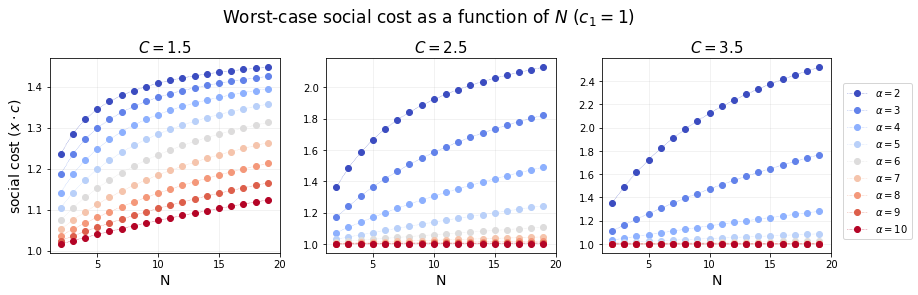

In [179]:
f, axarr = plt.subplots(ncols=3, figsize=(14, 4))

c = np.arange(1, len(alphas)+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

plot_handles = []
hline_handles = []
for i,a in enumerate(alphas):
    color = cmap.to_rgba(i+1)
    line, = axarr[0].plot(ns, c2res[i], linewidth=0.5, label=r'$\alpha=${:d}'.format(a), color=color,
                  linestyle='dotted', marker='o', fillstyle='full')
    plot_handles.append(line)
    
    axarr[1].plot(ns, c3res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    axarr[2].plot(ns, c4res[i], linewidth=0.5, color=color, linestyle='dotted', marker='o', fillstyle='full')
    
    
handles = plot_handles + hline_handles
labels = [h.get_label() for h in handles]

for ax in axarr:
    ax.set_xlabel('N', size=14)
    ax.grid(alpha=0.2)
    ax.set_xticks([5, 10, 15, 20])
#     ax.set_yscale('log')

axarr[-1].legend(handles, labels, bbox_to_anchor=(1.2, 0.9), loc='upper center', ncol=1)

axarr[0].set_ylabel('social cost ($x \cdot c$)', size=14)
axarr[0].set_title(r'$C=1.5$', size=15)
axarr[1].set_title(r'$C=2.5$', size=15)
axarr[2].set_title(r'$C=3.5$', size=15)

f.suptitle(r'Worst-case social cost as a function of $N$ ($c_1=1$)', size=17)
plt.subplots_adjust(top=0.8)
plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## DSIC size of n to hit different degradation thresholds

In [186]:
cs = np.arange(1.1, 10, 0.01)
ns = np.arange(2, 1000)
a  = 2.

p50s, p75s, p90s, p99s = [],[],[],[]

for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.5:
            p50s.append(n)
            break
for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.75:
            p75s.append(n)
            break
for c in tqdm(cs):
    for n in ns:
        costs = [1.]
        costs.extend([c]*n)
        costs = np.array(costs)
        x = getDSICAllo(costs, alpha=a)
        w = np.dot(x, costs)
        if w > c * 0.90:
            p90s.append(n)
            break
p50s = np.array(p50s)
p75s = np.array(p75s)
p90s = np.array(p90s)

p50s.shape, p75s.shape, p90s.shape

100%|██████████| 890/890 [00:21<00:00, 41.41it/s]  


((890,), (890,), (890,))

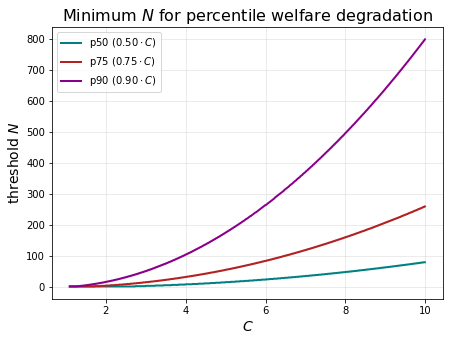

In [205]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(cs, p50s, linewidth=2, color='teal', label=r'p50 ($0.50 \cdot C$)')
ax.plot(cs, p75s, linewidth=2, color='firebrick', label=r'p75 ($0.75 \cdot C$)')
ax.plot(cs, p90s, linewidth=2, color='darkmagenta', label=r'p90 ($0.90 \cdot C$)')

ax.grid(alpha=0.3)
ax.set_xlabel(r'$C$', size=14)
ax.set_ylabel(r'threshold $N$', size=14)
ax.set_title('Minimum $N$ for percentile welfare degradation', size=16)
ax.legend()

plt.savefig('out.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

## social cost of PAB mechansim for two player game and various alphas 
- social cost = \tilde{b} \cdot x
- show various values of alpha

In [207]:
def getEquilBids(cs, a, guess=None):
    n = len(cs)
    bs = [sp.Symbol('b{}'.format(i)) for i in range(n)]
    
    denom = sum([bi**(-a) for bi in bs])
    xs    = [bi**(-a)/denom for bi in bs]
    us    = [(bs[i] - cs[i])*xs[i] for i in range(n)]
    diffs = [sp.diff(us[i], bs[i]) for i in range(n)]
    funcs = [sp.lambdify(bs, diffs[i]) for i in range(n)]
    
    def eqs(bs):
        return [f(*bs) for f in funcs]
    
    initial_guess = cs
    if guess != None:
        initial_guess = guess
    
    return fsolve(eqs, initial_guess)

def getAllos(bids, a):
    denom = sum([b**(-a) for b in bids])
    return np.array(bids**(-a)) / denom

In [211]:
n      = 2
c1     = 1.
alphas = [2,3,4]
c2s    = np.arange(1, 5, 0.1) 

In [213]:
bs = []
xs = []
ws = []
for a in alphas:
    temp1, temp2, temp3 = [], [], []
    for c2 in c2s:
        cs = np.array([c1, c2])
        b  = getEquilBids(cs, a=a)

        x = getAllos(b, a=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
        temp3.append(b)
    xs.append(temp1)
    ws.append(temp2)
    bs.append(temp3)
xs = np.array(xs)
ws = np.array(ws)
bs = np.array(bs)
xs.shape, ws.shape, bs.shape

((3, 40, 2), (3, 40), (3, 40, 2))

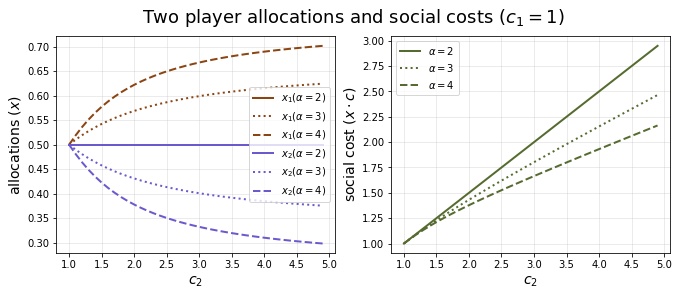

In [214]:
f, axarr = plt.subplots(ncols = 2, figsize=(11,4))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

f.suptitle(r'Two player allocations and social costs ($c_1=1$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
n      = 2
c1     = 1.
alphas = [2,3,4]
c2s    = np.arange(1, 5, 0.1) 

def getDSICAllo(cs, alpha):
    den = sum([c**(-alpha) for c in cs])
    return cs**(-alpha) / den

xs = []
ws = []
for a in alphas:
    temp1, temp2 = [], []
    for c2 in c2s:
        cs = np.array([c1, c2])

        x = getDSICAllo(cs, alpha=a)
        w = np.dot(x, cs)

        temp1.append(x)
        temp2.append(w)
    xs.append(temp1)
    ws.append(temp2)
xs = np.array(xs)
ws = np.array(ws)
xs.shape, ws.shape

f, axarr = plt.subplots(ncols = 2, figsize=(11,4))

ls = ['-', ':', '--']
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,0], label=r'$x_1 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='saddlebrown', linewidth=2)
for i, alpha in enumerate(alphas):
    axarr[0].plot(c2s, xs[i,:,1], label=r'$x_2 (\alpha={:1d})$'.format(alpha), linestyle=ls[i], 
                  color='slateblue', linewidth=2)

for i, alpha in enumerate(alphas):
    axarr[1].plot(c2s, ws[i,:], label=r'$\alpha={:1d}$'.format(alpha), linestyle=ls[i], 
                  color='darkolivegreen', linewidth=2)
    
for ax in axarr:
    ax.legend()
    ax.set_xlabel(r'$c_2$', size=14)
    ax.grid(alpha=0.3)
    
axarr[0].set_ylabel(r'allocations ($x$)', size=14)
axarr[1].set_ylabel(r'social cost ($x \cdot c$)', size=14)

f.suptitle(r'Two player allocations and social costs ($c_1=1$)', size=18)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()